## Neural Networks Keras Project

__Data__: subset of the LendingClub DataSet obtained from Kaggle. https://www.kaggle.com/wordsforthewise/lending-club

__Goal__: predict whether or not a new borrower will pay back their loan. We are given historical data on loans with information to whether or not a borrower defaulted. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

### Feature information

In [97]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [98]:
def feat_info(col_name):
    """ Prints out the feature description. """
    print(data_info.loc[col_name]['Description'])

In [99]:
# Insert a feature name here to read out the description
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


### Exploratory Data Analysis

In [254]:
# Read the data into a Dataframe
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

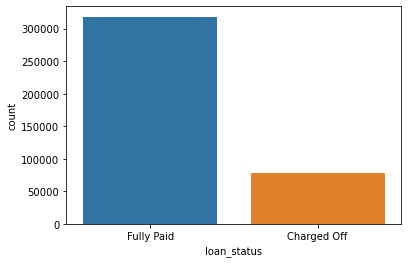

In [10]:
# Total number of loans either fully paid or charged off. 
# This is clearly an unbalanced problem.
plt.figure(figsize=(10,10))
sns.countplot(x='loan_status', data=df)

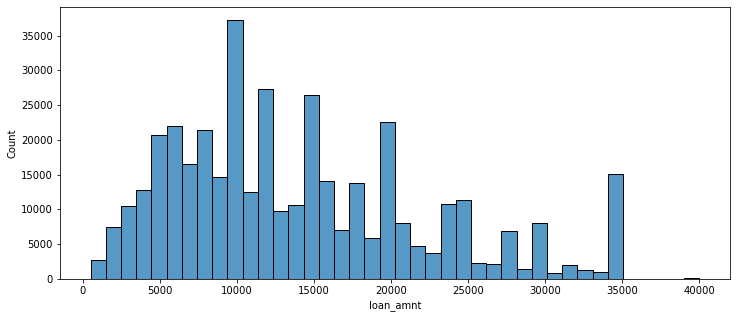

In [43]:
# Total count of the various loan amounts
plt.figure(figsize=(12,5))
sns.histplot(x='loan_amnt', data=df, bins=40);

In [24]:
df.corr().transpose()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


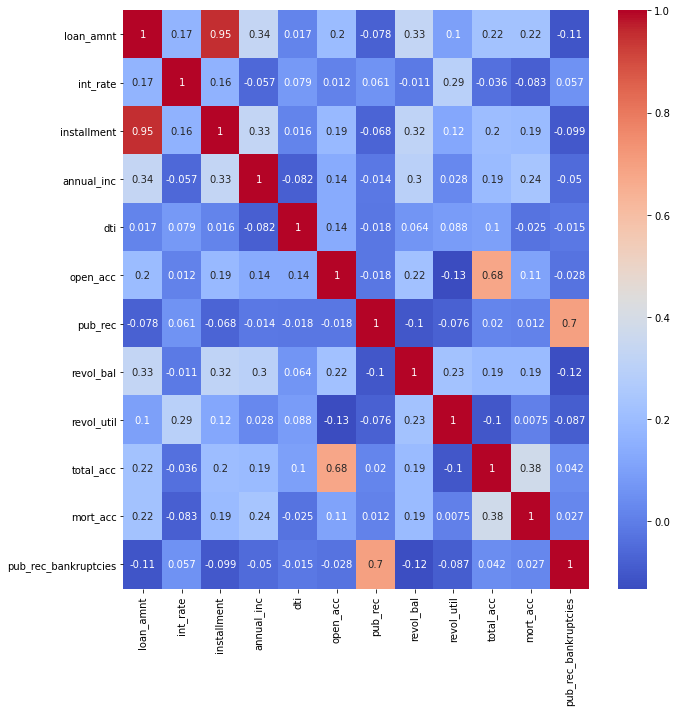

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.tight_layout();

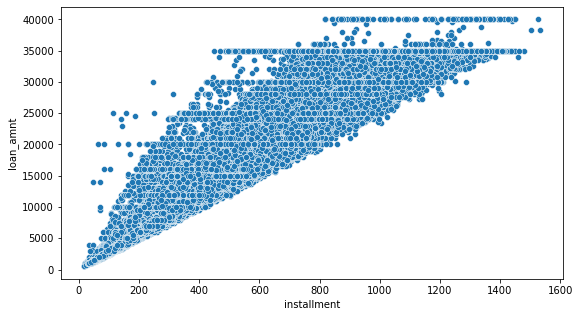

In [58]:
# Scatterplot of the loan amount and the corresponding loan amount
plt.figure(figsize=(9,5))
sns.scatterplot(x='installment', y='loan_amnt', data=df);

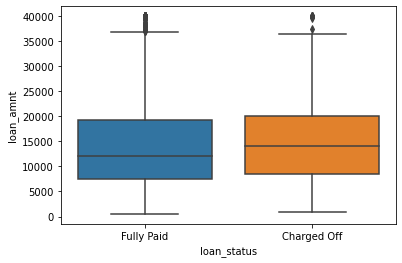

In [51]:
# Distributions of the loan amount for each loan status
sns.boxplot(x='loan_status', y='loan_amnt', data=df);

In [52]:
# The summary statistics for loan amounts for each loan status

df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [53]:
# Unique values for the grade column
df.grade.unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [54]:
# Unique values for the sub_grade column
df.sub_grade.unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

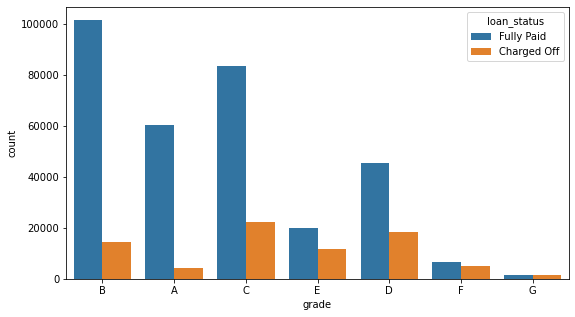

In [59]:
# Total number of loans for each grade for each loan status
plt.figure(figsize=(9,5))
sns.countplot(x='grade', data=df, hue='loan_status');

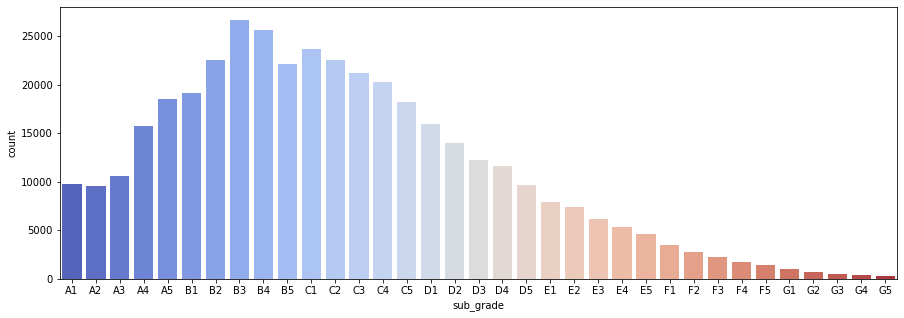

In [78]:
# Total count of each sub_grade 
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade', data=df, palette='coolwarm', order=sorted(df.sub_grade.unique()));

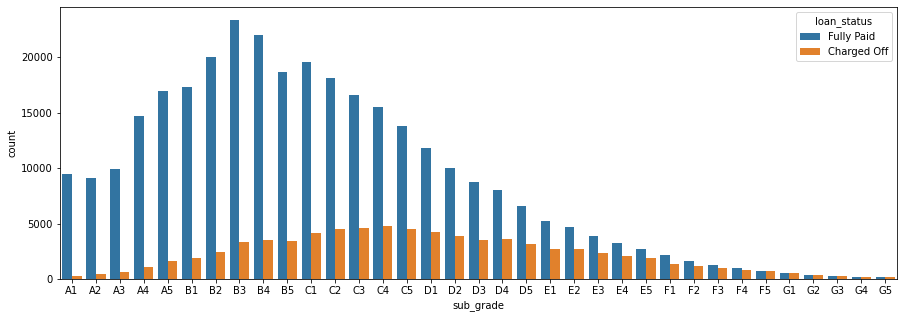

In [83]:
# Total count of each sub_grade for each loan status
plt.figure(figsize=(15,5))
sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sorted(list(df.sub_grade.unique())));

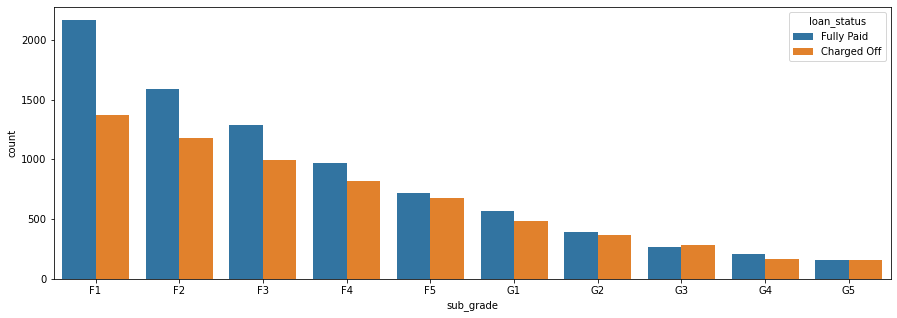

In [82]:
# Total count of F and G sub_grades for each loan status.
# For these subgrades it appears that the number of loans defaulted and paid back are similar.
plt.figure(figsize=(15,5))
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
sns.countplot(x='sub_grade', data=df[(df['grade']=='G') | (df['grade']=='F')], 
              hue='loan_status', order=sorted(f_and_g.sub_grade.unique()));

In [255]:
# Binary enocoding for loan_status: 1 = 'Fully Paid', 0 = 'Charge Off'
df['loan_repaid'] = df['loan_status'].apply(lambda row: 1 if row=='Fully Paid' else 0)

In [86]:
df[['loan_status', 'loan_repaid']].head()

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0


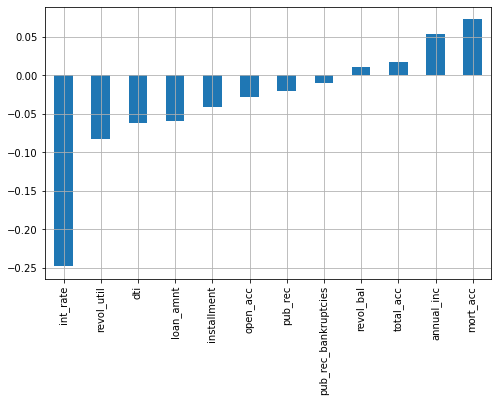

In [102]:
# Correlations of the numeric features with loan status
plt.figure(figsize=(8,5))
df.corr()['loan_repaid'][:-1].sort_values().plot.bar()
plt.grid();

### Data Preprocessing

#### Dealing with Missingness

In [22]:
# Total number of NAs in each column as percent of total dataframe length
# Note: mort_acc is nearly 10%, whereas others are less than 1% or around 5%.
na_df = df.isnull().sum().to_frame()
na_df.rename({0:'Total NAs'}, axis=1, inplace=True)
na_df['Percent of Total [%]'] = round(df.isnull().sum()/len(df)*100, 2)
na_df

,Total NAs,Percent of Total [%]
loan_amnt,0,0.00
term,0,0.00
int_rate,0,0.00
installment,0,0.00
grade,0,0.00
sub_grade,0,0.00
emp_title,22927,5.79
emp_length,18301,4.62
home_ownership,0,0.00
annual_inc,0,0.00


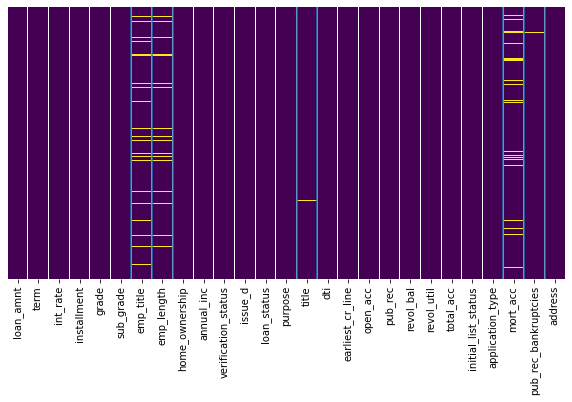

In [4]:
# Visualize the missing data
plt.figure(figsize=(10,5))
ax = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
ax.vlines([6, 7, 8, 14, 15, 24, 25, 26], *ax.get_ylim());

In [157]:
# Drop the emp_title?
df['emp_title'].nunique()

173105

In [24]:
df['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
Imagewox                                       1
AgencySales Manager/underwriting Counsel       1
Asst Teacher                                   1
City of BOwling Green                          1
WOODLAND AUTO BODY                             1
Name: emp_title, Length: 173105, dtype: int64

In [256]:
# Far too many unique titles, so imputation seems pointless.
# Will remove this feature
df = df.drop('emp_title', axis=1)

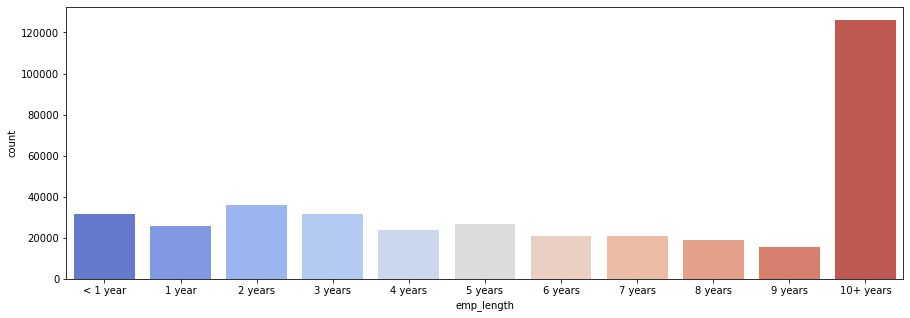

In [41]:
# Countplot of the emp_length feature with dropped NAs
plt.figure(figsize=(15,5))
emp_length_order = ['< 1 year', '1 year','2 years','3 years','4 years','5 years',
                    '6 years','7 years','8 years','9 years','10+ years'] 
sns.countplot(x=df['emp_length'].dropna(), data=df, order=emp_length_order, palette='coolwarm');

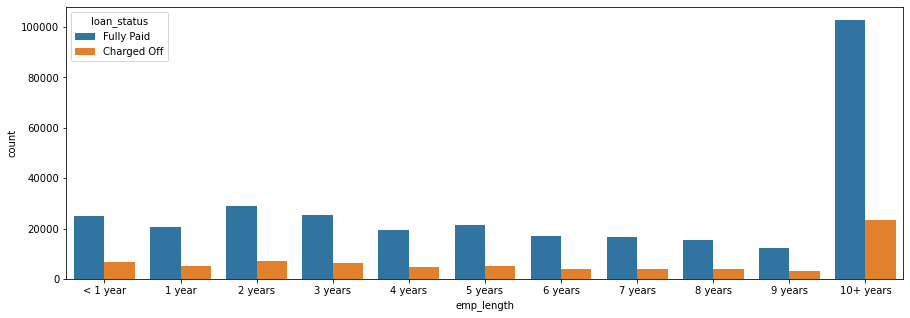

In [42]:
# Countplot of the emp_length feature with dropped NAs wrt to loan status
plt.figure(figsize=(15,5))
emp_length_order = ['< 1 year', '1 year','2 years','3 years','4 years','5 years',
                    '6 years','7 years','8 years','9 years','10+ years'] 
sns.countplot(x=df['emp_length'].dropna(), data=df, order=emp_length_order, hue='loan_status');

In [72]:
# We want to create a series that shows the percentage of loans charged off to fully paid for each category of emp_length
charged_off = df[df['loan_status']=='Charged Off'].groupby('emp_length') ['loan_amnt'].count()

In [73]:
fully_paid = df[df['loan_status']=='Fully Paid'].groupby('emp_length') ['loan_amnt'].count()

In [92]:
# For each category of emp_length is shown the percentage of charged off to fully paid
ratio_emp_length = round(charged_off/fully_paid*100, 2)
ratio_emp_length.index = emp_length_order
ratio_emp_length

< 1 year     24.86
1 year       22.58
2 years      23.96
3 years      24.26
4 years      23.82
5 years      23.79
6 years      23.33
7 years      24.19
8 years      24.96
9 years      25.07
10+ years    26.08
Name: loan_amnt, dtype: float64

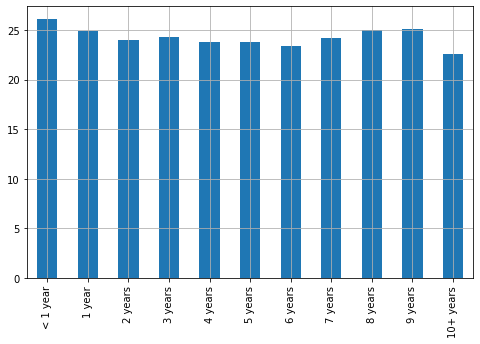

In [85]:
plt.figure(figsize=(8,5))
ratio_emp_length.plot.bar()
plt.grid();

In [257]:
# The ratio is similar across all categories, so we will drop the emp_length feature
df.drop('emp_length', axis=1, inplace=True)

In [87]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [258]:
# The title columns turns out to be a subcategory of the purpose column, so it will be dropped
df.drop('title', axis=1, inplace=True)

In [103]:
# Need to now deal with the mort_acc feature
print(feat_info('mort_acc'))
print(type(df.mort_acc.iloc[0]))

Number of mortgage accounts.
None
<class 'numpy.float64'>


In [104]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [112]:
print('Correlation with the mort_acc feature:')
df.corrwith(df['mort_acc'])

Correlation with the mort_acc feature:


loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
dtype: float64

In [118]:
#  total_acc appears to be correlated with mort_acc so will take a fillna approach
# This is the mean mort_acc per each total_account
print("Mean of mort_acc column per total_acc:")
total_acc_mean = df.groupby('total_acc')['mort_acc'].mean()
total_acc_mean

Mean of mort_acc column per total_acc:


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [121]:
def fill_mort_acc(total_acc, mort_acc):
    """Here we will take the mean total acc if the 
    mort_acc is nan, else we return the mort_acc value"""
    if np.isnan(mort_acc):
        return total_acc_mean[total_acc]
    else:
        return mort_acc

In [259]:
# Missing values in mort_acc now filled in with the mean total_acc
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [260]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [261]:
# For the last missing values, the rows containing these values will be dropped
df = df.dropna()

#### Continuing with Data Preprocessing

In [129]:
# Let's now look closely at the data types
# cf. https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type
g = df.columns.to_series().groupby(df.dtypes).groups
{k.name: v for k, v in g.items()}

{'float64': Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
        'pub_rec_bankruptcies'],
       dtype='object'),
 'object': Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
        'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
        'initial_list_status', 'application_type', 'address'],
       dtype='object')}

In [131]:
# The non-numeric columns:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### term

In [151]:
# First deal with the term items
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [262]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

#### grade 

In [263]:
# We will drop the grade feature since it is part of sub_grade
df.drop('grade', axis=1, inplace=True)

In [264]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [285]:
# One-hot encoding of the sub_grade feature
# A major problem arose while working on this task.
# Depending on how you pass in the data frame and column into get_dummies, it can have
# really negative effects thereafter. 
# Seen here is what we want. Notice you pass in the column to be encoded and DONT specify the data and the column arguments.
# This leads to the right labeling, concatentation, and no duplicate columns.
# See next cell.
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
new = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

print("Duplicate columns? ", new.columns.duplicated().any())
dummies.head()

Duplicate columns?  False


,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [286]:
# Here is the very problematic code that one would use if one is going by the docs.
# That is, pass in the dataframe and specify which column is to encode. 
# However, in this case it returns the entire data frame with additional ecoded columns.
# Once you concatentate, of course it leads to duplicate columns. 
# How this was presented in the lecturs is beyond me. 
dummies = pd.get_dummies(df, columns=['sub_grade'], drop_first=True, prefix='', prefix_sep='')
new = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

print("Duplicate columns? ", new.columns.duplicated().any())
dummies.head()

Duplicate columns?  True


,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [288]:
# Now back to the task at hand
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df.drop('sub_grade', axis=1), dummies], axis=1)

print("Duplicate columns? ", new.columns.duplicated().any())
df.head()

Duplicate columns?  False


,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [290]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

#### verification_status, application_type,initial_list_status,purpose

In [292]:
# One-hot encoding of these features
dummies = pd.get_dummies(df[['verification_status', 'application_type',
                                      'initial_list_status', 'purpose']], drop_first=True, prefix='', prefix_sep='')
dummies.head()

,Source Verified,Verified,INDIVIDUAL,JOINT,w,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [296]:
df = pd.concat([df.drop(['verification_status', 'application_type',
                                      'initial_list_status', 'purpose'], axis=1), dummies], axis=1)

print("Duplicate columns? ", new.columns.duplicated().any())
df.head()

Duplicate columns?  False


,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [297]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

#### home_ownership

In [298]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [302]:
# To reduce the categories, the values in NONE and ANY will be put in OTHER
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [303]:
# One-hot encoding of this feature
dummies = pd.get_dummies(df['home_ownership'], drop_first=True, prefix='', prefix_sep='')
dummies.head()

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0


In [305]:
df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

print("Duplicate columns? ", new.columns.duplicated().any())
df.head()

Duplicate columns?  False


,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,0,0,0,0,0,0,0,0


#### address

In [306]:
# Feature engineer the zip code from the address data
df['address'].iloc[0] # example observation

'0174 Michelle Gateway\nMendozaberg, OK 22690'

In [308]:
df['address'].iloc[0][-5:] # with slicing we can extract the zip code

'22690'

In [312]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [314]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [315]:
# One-hot encoding of this feature
dummies = pd.get_dummies(df['zip_code'], drop_first=True, prefix='', prefix_sep='')
dummies.head()

,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [318]:
df = pd.concat([df.drop('zip_code', axis=1), dummies], axis=1)

print("Duplicate columns? ", new.columns.duplicated().any())
df.head()

Duplicate columns?  False


,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0


In [319]:
df = df.drop('address', axis=1)

#### issue_d

In [320]:
feat_info('issue_d')

The month which the loan was funded


In [321]:
# Data leakage. Upon predicting loan payback we don't need an issue date beforehand
df = df.drop('issue_d', axis=1)

#### earliest_cr_line

In [322]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [327]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [324]:
type(df['earliest_cr_line'].iloc[0])

str

In [330]:
# We will just use apply to extract the year and overwrite the original column
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

#### Normalized Data

In [331]:
from sklearn.model_selection import train_test_split

In [332]:
df = df.drop('loan_status', axis=1) # drop the status column since it has been encoded

In [333]:
X = df.drop('loan_repaid', axis=1).values # Features to train on, as numpy array

In [334]:
y = df['loan_repaid'].values # target variables, numpy array

In [336]:
# split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [337]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler

In [338]:
scaler = MinMaxScaler()

In [339]:
X_train = scaler.fit_transform(X_train)

In [340]:
X_test = scaler.transform(X_test)

### Model 

In [343]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [344]:
model = Sequential()

# Input layer matches the number of features
model.add(Dense(78, activation='relu')) 
model.add(Dropout(0.2))

# Hidden layers:
model.add(Dense(39, activation='relu')) 
model.add(Dropout(0.2))

model.add(Dense(19, activation='relu')) 
model.add(Dropout(0.2))

# Output layer for binary classification
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [341]:
X_train.shape

(316175, 78)

In [345]:
model.fit(x=X_train, y=y_train, epochs=25,batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 5s 2ms/step - loss: 0.3472 - val_loss: 0.2643
Epoch 2/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2663 - val_loss: 0.2628
Epoch 3/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2639 - val_loss: 0.2622
Epoch 4/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2625 - val_loss: 0.2636
Epoch 5/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2611 - val_loss: 0.2618
Epoch 6/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2602 - val_loss: 0.2617
Epoch 7/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2600 - val_loss: 0.2613
Epoch 8/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2593 - val_loss: 0.2613
Epoch 9/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.2599 - val_loss: 0.2614
Epoch 10/25
1236/1236 [==============================] - 2s 2ms/step - loss: 0.258

In [346]:
from tensorflow.keras.models import load_model

In [347]:
model.save('full_data_project_model.h5')  

### Model Evaluation

In [348]:
losses = pd.DataFrame(model.history.history)

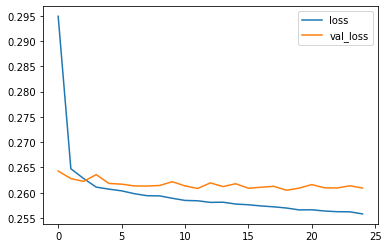

In [349]:
losses[['loss','val_loss']].plot();

In [350]:
from sklearn.metrics import classification_report,confusion_matrix

In [353]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [354]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



In [355]:
confusion_matrix(y_test,predictions)

array([[ 7140,  8518],
       [  327, 63059]], dtype=int64)

In [356]:
# Test the model on a random customer
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [358]:
(model.predict(new_customer.values.reshape(1,78)) > 0.5).astype("int32")

array([[1]])

In [359]:
# According to the model, the customer will repay their loan.
# But did this particular customer actually pay back the loan?
df.iloc[random_ind]['loan_repaid']

1.0

__Conclusion__: We went through extensive data preprocessing and some feature engineering before building a neural networks model to predict whether or not someone will repay their loan. Overall, the model performs fairly well. 